In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime 
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Посмотрим на данные + EDA

In [50]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/olist_customers_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/olist_orders_dataset.csv')
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/olist_order_items_dataset.csv')

## EDA таблицы customers

In [51]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [52]:
customers.shape

(99441, 5)

In [53]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [54]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [55]:
customers.duplicated().sum()

0

## EDA таблицы orders

In [56]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [57]:
orders.shape

(99441, 8)

In [58]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [59]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [60]:
orders.duplicated().sum()

0

Приведем все необходимые столбцы к формату даты

In [61]:
orders[['order_purchase_timestamp', 'order_approved_at', 
        'order_delivered_carrier_date', 'order_delivered_customer_date', 
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 
        'order_delivered_carrier_date', 'order_delivered_customer_date', 
        'order_estimated_delivery_date']].apply(pd.to_datetime)

## EDA таблицы items

In [62]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
items.shape

(112650, 7)

In [64]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [65]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [66]:
items.duplicated().sum()

0

Приведем столбец **shipping_limit_date** к формату даты

In [67]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

Определим какие заказы будут считаться покупкой.

Покупкой будем считать только те заказы, которые были завершены (имеется дата получения клиентом заказа)<br> и в статусе заказа стоит "доставлено" **('order_status' == 'delivered')**. Т.к. наличие соответствующих отметок говорит<br> нам о том, что заказанный товар добрался до адресата и не был отменен, недоступен или утерян на каком-либо<br> из этапов доставки. Таким образом, это прибавит достоверности и сделает более точными выводы.

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [68]:
# Объединим customers и orders:
df_first_case = orders.merge(customers, on='customer_id')

# Отберем только те строки, которые соответствуют определению "покупки":
delivered = df_first_case[df_first_case['order_status'] == 'delivered']\
            .dropna(subset=['order_delivered_customer_date'])
delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [69]:
# Посчитаем к-во уникальных пользователей, совершивших покупку:
purchases = delivered.groupby('customer_unique_id', as_index=False)\
                     .agg({'order_id': 'count'})

In [70]:
# Оставляем только пользователей с одной покупкой:
one_purchase = purchases[purchases['order_id'] == 1].shape[0]

In [71]:
print(f'Количество пользователей, совершивших только одну покупку: {one_purchase}')

Количество пользователей, совершивших только одну покупку: 90549


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Недоставленными заказами будем считать только те заказы, к-рые были отменены или недоступны.<br> Узнать судьбы других заказов, не отмеченных статусом 'delivered' и без соответствующей даты доставки,<br> мы не можем, однако и считать их недоставленными тоже не можем, т.к. заказ мог быть доставлен позднее или<br> заказ был доставлен, но попросту не отмечен как доставленный.

Отфильтруем только недоставленные заказы, согласно <n> описанию выше

In [72]:
not_delivered = orders.query("order_status == 'canceled' or order_status == 'unavailable'")
not_delivered.shape[0]

1234

Создадим столбец с годом и месяцем заказа:

In [73]:
not_delivered['month_of_purchase'] = not_delivered['order_purchase_timestamp'].dt.strftime('%Y-%m')
not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_of_purchase
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-08


Сгруппируем и посчитаем количество недоставленных заказов по месяцам и статусам:

In [74]:
undelivered_boys = not_delivered.groupby(['month_of_purchase', 'order_status'], as_index=False)\
                                .agg({"order_id": 'count'})\
                                .sort_values('month_of_purchase')\
                                .rename(columns={"order_id": 'undelivered'})
undelivered_boys.head()

,month_of_purchase,order_status,undelivered
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


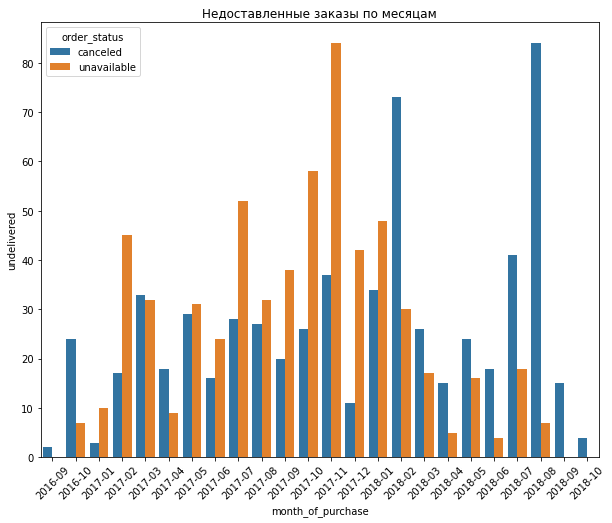

In [75]:
plt.figure(figsize=(10, 8))
sns.barplot(data=undelivered_boys, x='month_of_purchase', y='undelivered', hue='order_status')
plt.xticks(rotation=45)
plt.title('Недоставленные заказы по месяцам')
plt.show()

In [76]:
undelivered_boys.groupby('order_status', as_index=False)\
                .agg({'undelivered': 'mean'}).round()

,order_status,undelivered
0,canceled,26.0
1,unavailable,29.0


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается

Здесь нам понадобятся два датафрейма: orders и items. Подготовим их

In [77]:
# Смерджим items и orders:
df_third_case = items.merge(orders, on='order_id')

# Отберем только те строки, которые соответствуют определению "покупки":
delivered = df_third_case[df_third_case['order_status'] == 'delivered']\
            .dropna(subset=['order_delivered_customer_date'])
delivered.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


Определим день недели покупки и создадим соответствующий столбец

In [78]:
delivered['day_of_purchase'] = delivered['order_purchase_timestamp'].dt.day_name()
delivered.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_purchase
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday


In [79]:
orders_by_day = delivered.groupby(['product_id', 'day_of_purchase'])\
                         .agg({'order_id': 'count'})\
                         .reset_index().rename(columns={'order_id': 'purchase_quantity'})\
                         .sort_values('purchase_quantity', ascending=False)
orders_by_day.head()

,product_id,day_of_purchase,purchase_quantity
15595,422879e10f46682990de24d770e7f83d,Wednesday,93
35749,99a4788cb24856965c36a24e339b6058,Monday,91
40180,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40181,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
40176,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,83


In [80]:
day = pd.pivot_table(orders_by_day, index='product_id', columns='day_of_purchase', values='purchase_quantity')\
        .idxmax(axis=1).to_frame().rename(columns={0: 'the_day'})\
        .reset_index()
day.head()

,product_id,the_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


In [81]:
day_sorted = day.groupby('the_day', as_index=False)\
                .agg({'product_id': 'count'})\
                .sort_values('product_id', ascending=False)\
                .rename(columns={'product_id': 'days_count'})
day_sorted.head()

,the_day,days_count
1,Monday,6137
0,Friday,5929
5,Tuesday,4400
4,Thursday,4361
6,Wednesday,4042


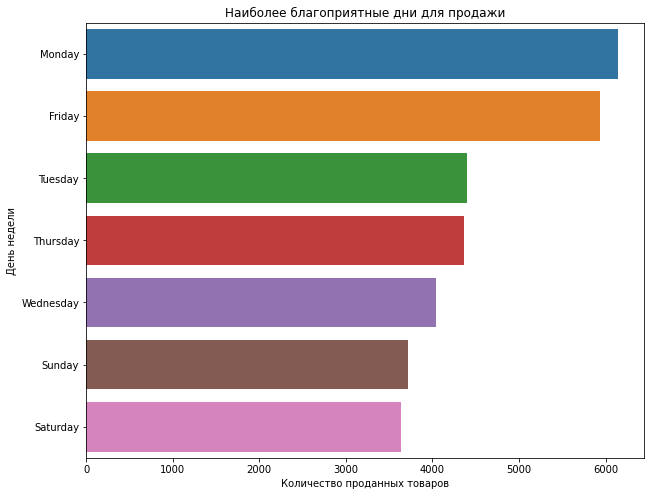

In [82]:
plt.figure(figsize=(10, 8))
sns.barplot(data=day_sorted, y='the_day', x='days_count')
plt.title('Наиболее благоприятные дни для продажи')
plt.xlabel('Количество проданных товаров')
plt.ylabel('День недели')
plt.show()

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [83]:
avg_buys_per_week = customers.merge(orders, on="customer_id")
avg_buys_per_week.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Отберем только строки с завершенными заказами

In [84]:
orders_per_week = avg_buys_per_week.loc[avg_buys_per_week['order_status'] == 'delivered']

In [85]:
avg_opw = orders_per_week.groupby(['order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
                         .agg({'order_id': 'count'}) \
                         .rename(columns={'order_id': 'orders_per_month'})
avg_opw.head()

,order_purchase_timestamp,customer_unique_id,orders_per_month
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1
3,2016-10-03 21:13:36,61db744d2f835035a5625b59350c6b63,1
4,2016-10-03 22:06:03,8d3a54507421dbd2ce0a1d58046826e0,1


Находим среднее количество недель:

In [86]:
avg_opw['weeks'] = (avg_opw['order_purchase_timestamp'].dt.daysinmonth) / 7
avg_opw.head()

,order_purchase_timestamp,customer_unique_id,orders_per_month,weeks
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1,4.428571
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1,4.428571
3,2016-10-03 21:13:36,61db744d2f835035a5625b59350c6b63,1,4.428571
4,2016-10-03 22:06:03,8d3a54507421dbd2ce0a1d58046826e0,1,4.428571


Находим среднее количество заказов в неделю:

In [87]:
avg_opw['orders_per_week'] = avg_opw['orders_per_month'] / avg_opw['weeks']
avg_opw[['customer_unique_id', 'orders_per_week']].head()

,customer_unique_id,orders_per_week
0,830d5b7aaa3b6f1e9ad63703bec97d23,0.233333
1,32ea3bdedab835c3aa6cb68ce66565ef,0.225806
2,2f64e403852e6893ae37485d5fcacdaf,0.225806
3,61db744d2f835035a5625b59350c6b63,0.225806
4,8d3a54507421dbd2ce0a1d58046826e0,0.225806


## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Подготовим данные:

In [88]:
df = customers.merge(orders, on='customer_id')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


В представленных данных имеются строки за 2016, 2017, 2018 года.<br> Из них только данные за 2017 год являются полными.<br> 
Таким образом, далее рассматривать будем данные за 2017 год,<br> а также первые 3 месяца за 2018 года (чтобы последняя когорта за 2017 год была полной)

In [89]:
date_min = '2017-01-01'
date_max = '2018-04-01'

In [90]:
df = df.query('order_approved_at >= @date_min and order_approved_at <= @date_max')

In [91]:
df = df.loc[df['order_status'] == 'delivered']

In [92]:
df['order_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,2017-09
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,2018-02


Определим дату первой покупки для каждого покупателя:

In [93]:
first_purchase = df.groupby('customer_unique_id', as_index=False) \
                   .agg({'order_month': 'min'})\
                   .sort_values('customer_unique_id') \
                   .rename(columns={'order_month': 'month_of_first_purchase'})

first_purchase.head()

,customer_unique_id,month_of_first_purchase
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


Определяем когорты:

In [94]:
cohorts = df[['customer_unique_id', 'order_id', 'order_month']].merge(first_purchase, on='customer_unique_id')

cohorts = cohorts.groupby(['month_of_first_purchase', 'order_month']) \
                 .agg({'customer_unique_id': 'nunique'})\
                 .rename(columns={'customer_unique_id': 'users_count'})
cohorts.head()

users_count
month_of_first_purchase order_month             
2017-01                 2017-01              716
                        2017-02                2
                        2017-03                2
                        2017-04                1
                        2017-05                3

In [95]:
def CohortPeriod(df):
    df['cohort_period'] = np.arange(len(df)) + 0
    return df

In [96]:
cohorts = cohorts.groupby(level=0).apply(CohortPeriod)

cohorts.head()

users_count  cohort_period
month_of_first_purchase order_month                            
2017-01                 2017-01              716              0
                        2017-02                2              1
                        2017-03                2              2
                        2017-04                1              3
                        2017-05                3              4

In [97]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_period', 'month_of_first_purchase'], inplace=True)
cohorts.head()

,,order_month,users_count
cohort_period,month_of_first_purchase,,
0,2017-01,2017-01,716
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [98]:
cohort_grouped = pd.pivot_table(cohorts, columns='cohort_period', index='month_of_first_purchase', values='users_count')
cohort_grouped

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13
month_of_first_purchase,,,,,,,,,,,,,,
2017-01,716.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0
2017-02,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,21.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,18.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитываем удержание клиентов на третий месяц после первой покупки:

In [99]:
retention_rate = cohort_grouped.div(cohort_grouped.iloc[:, 0], axis=0)
retention_3rd_month = retention_rate.iloc[:, 2]
retention_3rd_month_rounded = retention_3rd_month.round(4) * 100
top_retention = retention_3rd_month_rounded.sort_values(ascending=False).head(1)
top_retention

month_of_first_purchase
2017-09    0.55
Name: 2, dtype: float64

Таким образом, наибольший retention - 0.55% в когорте  **'2017-09'**

## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию

In [100]:
rfm = orders.merge(customers, on='customer_id').merge(items, on='order_id')
rfm = rfm.query("order_status == 'delivered' and order_delivered_customer_date != 'NaT'")
rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Находим даты первой и последней покупки за весь рассматриваемый период:

In [101]:
print(f'Дата первой покупки: {min(rfm["order_delivered_customer_date"]).date()}',
      f'Дата последней покупки: {max(rfm["order_delivered_customer_date"]).date()}', sep='\n')

Дата первой покупки: 2016-10-11
Дата последней покупки: 2018-10-17


Т.к. данные довольно старые, то за текущую дату примем следующий день после даты последней покупки

In [102]:
now = rfm['order_delivered_customer_date'].max() + datetime.timedelta(days=1)
now

Timestamp('2018-10-18 13:22:46')

In [103]:
rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Посчитаем параметры **Recency, Frequency, Monetary** для каждого пользователя

In [104]:
RFM = rfm.groupby('customer_unique_id', as_index=False)\
         .agg(Recency=('order_delivered_customer_date', lambda x: (now - x.max()).days),
              Frequency=('order_id', 'nunique'),
              Monetary=('price', 'sum'))
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90
2,0000f46a3911fa3c0805444483337064,560,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00


In [105]:
RFM.isna().sum()

customer_unique_id    0
Recency               0
Frequency             0
Monetary              0
dtype: int64

In [106]:
RFM.describe([0.05, 0.25, 0.5, 0.75, 0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
Recency,93350.0,274.145817,151.963456,1.00,63.0,153.00,253.0,384.0000,555.000,736.0
Frequency,93350.0,1.033423,0.209106,1.00,1.0,1.00,1.0,1.0000,1.000,15.0
Monetary,93350.0,141.620235,215.702028,0.85,19.8,47.65,89.7,154.6975,419.833,13440.0


In [107]:
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90
2,0000f46a3911fa3c0805444483337064,560,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00


### Recency

Границы будут основываться на значениях 25, 50 и 75 перцентилей <br>
Чем больше количество дней, тем ниже будет ранг

In [108]:
r_q25 = RFM.Recency.quantile(0.25)
r_q50 = RFM.Recency.quantile(0.5)
r_q75 = RFM.Recency.quantile(0.75)

def get_recency(col):
    if col < r_q25:
        return 4
    elif col >= r_q25 and col < r_q50:
        return 3
    elif col >= r_q50 and col < r_q75:
        return 2
    elif col >= r_q75:
        return 1

In [109]:
RFM['r'] = RFM.Recency.apply(lambda x: get_recency(x))
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,r
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,3
2,0000f46a3911fa3c0805444483337064,560,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,2
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,2


### Frequency

In [110]:
RFM.Frequency.value_counts().sort_values(ascending=False)

1     90549
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: Frequency, dtype: int64

Превалирующая часть клиентов совершила одну покупку, а значит <br>
разбивка по квантилям здесь не подойдет. <br>
 Разбиение будет по количеству покупок, чем больше к-во покупок, <br>
тем больше ранг 

In [111]:
def get_frequency(col):
    if col == 1:
        return 1
    elif col == 2:
        return 2
    elif col == 3:
        return 3
    elif col > 3:
        return 4

In [112]:
RFM['f'] = RFM.Frequency.apply(lambda x: get_frequency(x))
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,r,f
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,3,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,3,1
2,0000f46a3911fa3c0805444483337064,560,1,69.00,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,2,1
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,2,1


In [113]:
RFM['f'].value_counts()

1    90549
2     2573
3      181
4       47
Name: f, dtype: int64

### Monetary

Чем больше сумма, тем выше ранг

In [114]:
m_q25 = RFM.Recency.quantile(0.25)
m_q50 = RFM.Recency.quantile(0.5)
m_q75 = RFM.Recency.quantile(0.75)

In [115]:
def get_monetary(col):
    if col < m_q25:
        return 4
    elif col >= m_q25 and col < m_q50:
        return 3
    elif col >= m_q50 and col < m_q75:
        return 2
    elif col >= m_q75:
        return 1

In [116]:
RFM['m'] = RFM.Monetary.apply(lambda x: get_monetary(x))
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,3,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,3,1,4
2,0000f46a3911fa3c0805444483337064,560,1,69.00,1,1,4
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,2,1,4
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,2,1,3


### Найдем нижние и верхнии границы

In [117]:
# Recency
recency_segment_borders = RFM.groupby('r', as_index=False)\
                             .agg({'Recency': ['min', 'max']})\
                             .rename(columns={"r": 'RFM_segment', 'min': 'lowest', 'max': 'highest'})
recency_segment_borders

RFM_segment Recency        
               lowest highest
0           1     384     736
1           2     253     383
2           3     153     252
3           4       1     152

In [118]:
# Frequency
frequency_segment_borders = RFM.groupby('f', as_index=False)\
                               .agg({'Frequency': ['min', 'max']})\
                               .rename(columns={"f": 'RFM_segment', 'min': 'lowest', 'max': 'highest'})
frequency_segment_borders

RFM_segment Frequency        
                 lowest highest
0           1         1       1
1           2         2       2
2           3         3       3
3           4         4      15

In [119]:
# Monetary
monetary_segment_borders = RFM.groupby('m', as_index=False)\
                              .agg({'Monetary': ['min', 'max']})\
                              .rename(columns={"m": 'RFM_segment', 'min': 'lowest', 'max': 'highest'})
monetary_segment_borders

RFM_segment Monetary          
                lowest   highest
0           1   384.00  13440.00
1           2   253.00    383.90
2           3   153.00    252.99
3           4     0.85    152.99

### Соединим полученные значения R, F, M в RFM_Score

In [120]:
RFM['RFM_Score'] = RFM['r'].map(str) + RFM['f'].map(str) + RFM['m'].map(str)
RFM.tail()

,customer_unique_id,Recency,Frequency,Monetary,r,f,m,RFM_Score
93345,fffcf5a5ff07b0908bd4e2dbc735a684,469,1,1570.00,1,1,1,111
93346,fffea47cd6d3cc0a88bd621562a9d061,281,1,64.89,2,1,4,214
93347,ffff371b4d645b6ecea244b27531430a,603,1,89.90,1,1,4,114
93348,ffff5962728ec6157033ef9805bacc48,157,1,115.00,3,1,4,314
93349,ffffd2657e2aad2907e67c3e9daecbeb,526,1,56.99,1,1,4,114


In [121]:
RFM['RFM_Score'].nunique()

57

### Объединим кластеры в сегменты

In [122]:
# Функция, определяющая сегмент в зав-ти от RFM-Score
def assign_segment(x):
    if x in ['444', '443']:
        return 'VIP'
    elif x in ['413', '412', '414', '412', '411']:
        return 'loyal_client'
    elif x in ['332', '331', '334', '333', '332']:
        return 'potential_loyalists'
    elif x == 111:
        return 'new_client'
    else:
        return 'rare_client'

In [123]:
RFM['Segment'] = RFM['RFM_Score'].apply(assign_segment)

In [126]:
rfm_vis = RFM.groupby('RFM_Score', as_index=False) \
             .agg({'customer_unique_id': 'count'}) \
             .rename(columns={'customer_unique_id': 'num_of_customers'})
rfm_vis.head()

,RFM_Score,num_of_customers
0,111,1287
1,112,1267
2,113,2972
3,114,17255
4,121,75


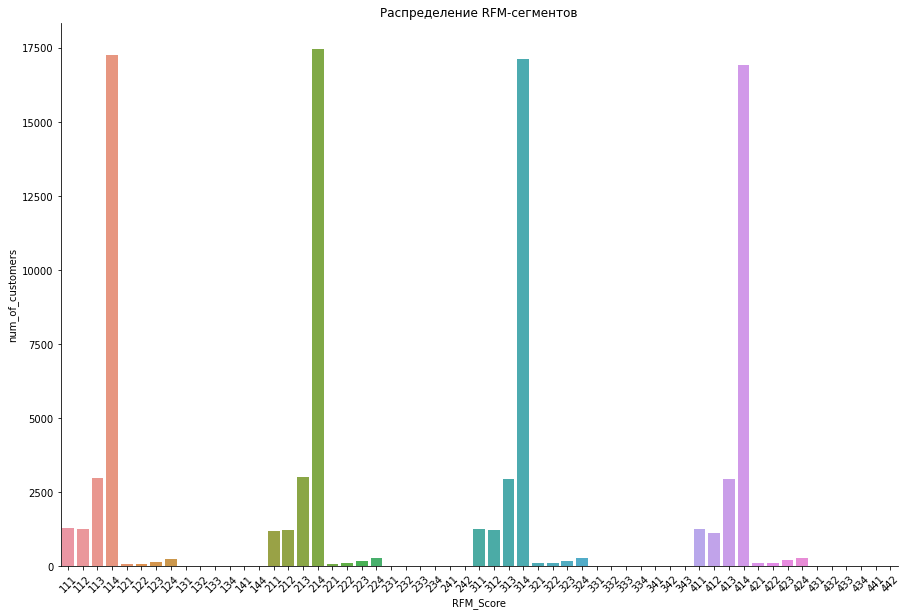

In [130]:
plt.figure(figsize=(15, 10))
sns.barplot(data=rfm_vis, x='RFM_Score', y='num_of_customers')
plt.xticks(rotation=45)
plt.title('Распределение RFM-сегментов')
sns.despine()
plt.show()

In [128]:
RFM.Segment.value_counts()

rare_client            71020
loyal_client           22278
potential_loyalists       52
Name: Segment, dtype: int64

In [129]:
# Посмотрим сколько прибыли приносит каждый сегмент:
revenue = RFM.groupby('Segment', as_index=False)\
             .agg({'Monetary': 'sum'})\
             .sort_values('Monetary', ascending=False)\
             .rename(columns={'Monetary': 'Revenue'})
revenue

,Segment,Revenue
2,rare_client,1.007085e+07
0,loyal_client,3.133328e+06
1,potential_loyalists,1.607282e+04


## Выводы:

По результам анализа видим, что преобладающее количество клиентов (71020) совершили всего одну покупку. Это может указывать на низкую лояльность клиентов к нашему продукту (или компании). Возможно, они были не удовлетворены качеством товара, сервисом или не видят ценности в нашем товаре. Также может быть полезным детальнее изучить причины того, почему клиенты редко совершают повторные покупки (возможно, необходимо предлагать больше стимулов для совершения повторных покупок), рассмотреть каждый сегмент поглубже, чтобы делать более персонализированные предложения, согласно поведению и предпочтениям каждого сегмента. Вцелом, имеет смысл пересмотреть маркетинговые стратегии по удержанию клиентов и привлечению новых потенциальных лояльных клиентов, улучшить качество товаров.